In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys 
import requests
import datetime as dt
import seaborn as sns
from matplotlib import dates as mpl_dates

In [2]:
key = 'private key' #see Tomorrow.io to obtain a private key

In [3]:
#curl --request GET --url \
url = 'https://api.tomorrow.io/v4/timelines'

In [4]:
querystring = {
"location":"64.8, 147.7",
"fields":["precipitationIntensity", "precipitationType", "temperature", "cloudCover"],
"units":"imperial",
"timesteps":"1d",
"apikey":key}

In [5]:
response = requests.request("GET", url, params=querystring)

In [6]:
response.text

'{"data":{"timelines":[{"timestep":"1d","startTime":"2021-09-29T19:00:00Z","endTime":"2021-10-14T19:00:00Z","intervals":[{"startTime":"2021-09-29T19:00:00Z","values":{"precipitationIntensity":0.001,"precipitationType":2,"temperature":28.11,"cloudCover":100}},{"startTime":"2021-09-30T19:00:00Z","values":{"precipitationIntensity":0.0111,"precipitationType":2,"temperature":26.33,"cloudCover":100}},{"startTime":"2021-10-01T19:00:00Z","values":{"precipitationIntensity":0.0004,"precipitationType":2,"temperature":36.1,"cloudCover":100}},{"startTime":"2021-10-02T19:00:00Z","values":{"precipitationIntensity":0.0008,"precipitationType":2,"temperature":27.88,"cloudCover":96.92}},{"startTime":"2021-10-03T19:00:00Z","values":{"precipitationIntensity":0.0012,"precipitationType":2,"temperature":20.55,"cloudCover":95.83}},{"startTime":"2021-10-04T19:00:00Z","values":{"precipitationIntensity":0.0007,"precipitationType":2,"temperature":17.38,"cloudCover":91.44}},{"startTime":"2021-10-05T19:00:00Z","valu

In [7]:
#check response type
type(response.text)

str

In [8]:
response_json = response.json()

In [9]:
#observe the dictionary
response_json

{'data': {'timelines': [{'timestep': '1d',
    'startTime': '2021-09-29T19:00:00Z',
    'endTime': '2021-10-14T19:00:00Z',
    'intervals': [{'startTime': '2021-09-29T19:00:00Z',
      'values': {'precipitationIntensity': 0.001,
       'precipitationType': 2,
       'temperature': 28.11,
       'cloudCover': 100}},
     {'startTime': '2021-09-30T19:00:00Z',
      'values': {'precipitationIntensity': 0.0111,
       'precipitationType': 2,
       'temperature': 26.33,
       'cloudCover': 100}},
     {'startTime': '2021-10-01T19:00:00Z',
      'values': {'precipitationIntensity': 0.0004,
       'precipitationType': 2,
       'temperature': 36.1,
       'cloudCover': 100}},
     {'startTime': '2021-10-02T19:00:00Z',
      'values': {'precipitationIntensity': 0.0008,
       'precipitationType': 2,
       'temperature': 27.88,
       'cloudCover': 96.92}},
     {'startTime': '2021-10-03T19:00:00Z',
      'values': {'precipitationIntensity': 0.0012,
       'precipitationType': 2,
       'tem

In [10]:
response_json.keys()

dict_keys(['data'])

In [11]:
response_json['data'].keys()

dict_keys(['timelines'])

In [12]:
#obtain observations for a slice of the data
response_json['data']['timelines'][0]['intervals'][1]['values']

{'precipitationIntensity': 0.0111,
 'precipitationType': 2,
 'temperature': 26.33,
 'cloudCover': 100}

In [13]:
#length of observations
length = len(response_json['data']['timelines'][0]['intervals'])
length

16

There are 15 weather entries in this dataset.

In [14]:
for r in range(length):
    print(response_json['data']['timelines'][0]['intervals'][r])

{'startTime': '2021-09-29T19:00:00Z', 'values': {'precipitationIntensity': 0.001, 'precipitationType': 2, 'temperature': 28.11, 'cloudCover': 100}}
{'startTime': '2021-09-30T19:00:00Z', 'values': {'precipitationIntensity': 0.0111, 'precipitationType': 2, 'temperature': 26.33, 'cloudCover': 100}}
{'startTime': '2021-10-01T19:00:00Z', 'values': {'precipitationIntensity': 0.0004, 'precipitationType': 2, 'temperature': 36.1, 'cloudCover': 100}}
{'startTime': '2021-10-02T19:00:00Z', 'values': {'precipitationIntensity': 0.0008, 'precipitationType': 2, 'temperature': 27.88, 'cloudCover': 96.92}}
{'startTime': '2021-10-03T19:00:00Z', 'values': {'precipitationIntensity': 0.0012, 'precipitationType': 2, 'temperature': 20.55, 'cloudCover': 95.83}}
{'startTime': '2021-10-04T19:00:00Z', 'values': {'precipitationIntensity': 0.0007, 'precipitationType': 2, 'temperature': 17.38, 'cloudCover': 91.44}}
{'startTime': '2021-10-05T19:00:00Z', 'values': {'precipitationIntensity': 0, 'precipitationType': 0, 

In [15]:
#first recorded temperature
temp = response_json['data']['timelines'][0]['intervals'][0]['values']['temperature']
temp

28.11

In [16]:
forecasts = response_json['data']['timelines'][0]['intervals']
forecasts

[{'startTime': '2021-09-29T19:00:00Z',
  'values': {'precipitationIntensity': 0.001,
   'precipitationType': 2,
   'temperature': 28.11,
   'cloudCover': 100}},
 {'startTime': '2021-09-30T19:00:00Z',
  'values': {'precipitationIntensity': 0.0111,
   'precipitationType': 2,
   'temperature': 26.33,
   'cloudCover': 100}},
 {'startTime': '2021-10-01T19:00:00Z',
  'values': {'precipitationIntensity': 0.0004,
   'precipitationType': 2,
   'temperature': 36.1,
   'cloudCover': 100}},
 {'startTime': '2021-10-02T19:00:00Z',
  'values': {'precipitationIntensity': 0.0008,
   'precipitationType': 2,
   'temperature': 27.88,
   'cloudCover': 96.92}},
 {'startTime': '2021-10-03T19:00:00Z',
  'values': {'precipitationIntensity': 0.0012,
   'precipitationType': 2,
   'temperature': 20.55,
   'cloudCover': 95.83}},
 {'startTime': '2021-10-04T19:00:00Z',
  'values': {'precipitationIntensity': 0.0007,
   'precipitationType': 2,
   'temperature': 17.38,
   'cloudCover': 91.44}},
 {'startTime': '2021-10-

In [17]:
weather_dict = {}
dates, temps, cloud_coverage, precipitation_intensity, precipitation_type = [], [], [], [], []

for daily_forecast in forecasts:
    date = daily_forecast['startTime'][0:15]
    temp = daily_forecast['values']['temperature']
    cloudy = daily_forecast['values']['cloudCover']
    precip_int = daily_forecast['values']['precipitationIntensity']
    precip_type = daily_forecast['values']['precipitationType']
    print(f'On {date},the temperature will be {temp},with {cloudy}% cloud coverage and {(precip_int):.3f} in/h precipitation.')
    
    dates.append(date)
    temps.append(temp)
    cloud_coverage.append(cloudy)
    precipitation_intensity.append(precip_int)
    precipitation_type.append(precip_type)

On 2021-09-29T19:0,the temperature will be 28.11,with 100% cloud coverage and 0.001 in/h precipitation.
On 2021-09-30T19:0,the temperature will be 26.33,with 100% cloud coverage and 0.011 in/h precipitation.
On 2021-10-01T19:0,the temperature will be 36.1,with 100% cloud coverage and 0.000 in/h precipitation.
On 2021-10-02T19:0,the temperature will be 27.88,with 96.92% cloud coverage and 0.001 in/h precipitation.
On 2021-10-03T19:0,the temperature will be 20.55,with 95.83% cloud coverage and 0.001 in/h precipitation.
On 2021-10-04T19:0,the temperature will be 17.38,with 91.44% cloud coverage and 0.001 in/h precipitation.
On 2021-10-05T19:0,the temperature will be 16.57,with 76.91% cloud coverage and 0.000 in/h precipitation.
On 2021-10-06T19:0,the temperature will be 19.42,with 100% cloud coverage and 0.000 in/h precipitation.
On 2021-10-07T19:0,the temperature will be 19.36,with 100% cloud coverage and 0.000 in/h precipitation.
On 2021-10-08T19:0,the temperature will be 19.98,with 99.

In [18]:
dates

['2021-09-29T19:0',
 '2021-09-30T19:0',
 '2021-10-01T19:0',
 '2021-10-02T19:0',
 '2021-10-03T19:0',
 '2021-10-04T19:0',
 '2021-10-05T19:0',
 '2021-10-06T19:0',
 '2021-10-07T19:0',
 '2021-10-08T19:0',
 '2021-10-09T19:0',
 '2021-10-10T19:0',
 '2021-10-11T19:0',
 '2021-10-12T19:0',
 '2021-10-13T19:0',
 '2021-10-14T19:0']

In [19]:
#add observations to an empty dataframe
df = pd.DataFrame() #create dataframe
#populate dataframe with observations
df['date'] = dates
df['temperature'] = temps
df['perc_clouds'] = cloud_coverage
df['precip_int'] = precipitation_intensity
df['precip_type'] = precipitation_type

In [20]:
#check first three rows of created dataframe
df.head(3)

,date,temperature,perc_clouds,precip_int,precip_type
0,2021-09-29T19:0,28.11,100.0,0.0010,2
1,2021-09-30T19:0,26.33,100.0,0.0111,2
2,2021-10-01T19:0,36.10,100.0,0.0004,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         16 non-null     object 
 1   temperature  16 non-null     float64
 2   perc_clouds  16 non-null     float64
 3   precip_int   16 non-null     float64
 4   precip_type  16 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 768.0+ bytes


There are no missing values. The date column should be converted to datetime format. The other data types make sense.

In [22]:
#check type of date column
type(df['date'])

pandas.core.series.Series

In [23]:
#convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df['date'].head(3)

0   2021-09-29 19:00:00
1   2021-09-30 19:00:00
2   2021-10-01 19:00:00
Name: date, dtype: datetime64[ns]

In [24]:
#extract day of month from date
df['day'] = df['date'].dt.day
df.head()

,date,temperature,perc_clouds,precip_int,precip_type,day
0,2021-09-29 19:00:00,28.11,100.00,0.0010,2,29
1,2021-09-30 19:00:00,26.33,100.00,0.0111,2,30
2,2021-10-01 19:00:00,36.10,100.00,0.0004,2,1
3,2021-10-02 19:00:00,27.88,96.92,0.0008,2,2
4,2021-10-03 19:00:00,20.55,95.83,0.0012,2,3


In [25]:
#generate descriptive statistics for numerical columns
df[['temperature', 'perc_clouds', 'precip_int']].describe()

,temperature,perc_clouds,precip_int
count,16.000000,16.000000,16.000000
mean,19.229375,97.465000,0.001269
std,8.027329,5.959163,0.002748
min,1.290000,76.910000,0.000000
25%,16.327500,98.127500,0.000000
50%,19.200000,100.000000,0.000400
75%,21.995000,100.000000,0.001050
max,36.100000,100.000000,0.011100


The average temperature is 21F with 97% cloud coverage. There is almost no precipitation expected. Thus, it's mostly cold, dry, and cloudy in Fairbanks at this time of year.

In [26]:
df['precip_type'].unique()

array([2, 0], dtype=int64)

In [27]:
df['precip_type'].value_counts()

2    9
0    7
Name: precip_type, dtype: int64

There are two precipitation types in this dataset. A look at the API documentation shows that these correspond to no precipitation (precipitation type 0) and snow (precipitation type 2). In the 15 days considered, the snowy days (7:15) are almost as many as no snow days (8:15). However, even the snowfall is minimal, at most 0.0111 in/h.

Text(0.5, 1.0, 'Variation of Temperature with Precipitation Intensity in Fairbanks, Alaska')

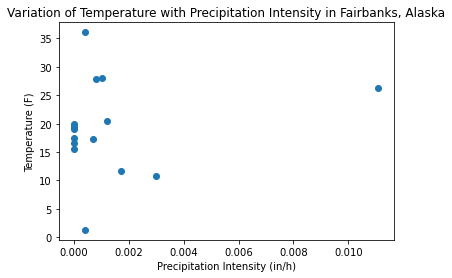

In [28]:
x = df['precip_int']
y = df['temperature']
plt.scatter(x,y)
plt.xlabel('Precipitation Intensity (in/h)')
plt.ylabel('Temperature (F)')
plt.title('Variation of Temperature with Precipitation Intensity in Fairbanks, Alaska')

There is almost no precipitation expected, with a temperature range of approximately 25F.

Text(0.5, 1.0, 'Variation of Temperature with Cloud Coverage in Fairbanks, Alaska')

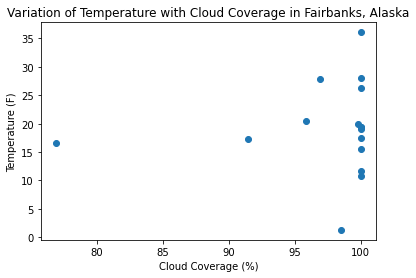

In [29]:
x = df['perc_clouds']
y = df['temperature']
plt.scatter(x,y)
plt.xlabel('Cloud Coverage (%)')
plt.ylabel('Temperature (F)')
plt.title('Variation of Temperature with Cloud Coverage in Fairbanks, Alaska')

On most days, the cloud coverage is over 80% and usually about 100%. The temperature varies by about 25F.

Text(0.5, 1.0, 'Variation of Precipitation with Increasing Cloud Coverage in Fairbanks, Alaska')

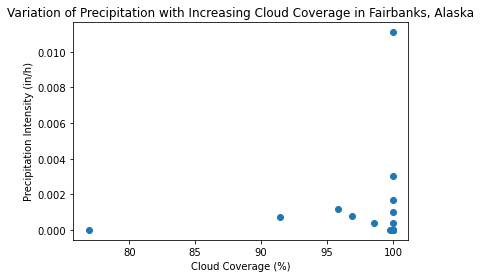

In [30]:
x = df['perc_clouds']
y = df['precip_int']
plt.scatter(x,y)
plt.xlabel('Cloud Coverage (%)')
plt.ylabel('Precipitation Intensity (in/h)')
plt.title('Variation of Precipitation with Increasing Cloud Coverage in Fairbanks, Alaska')

There is very little precipitation, even with 100% cloud coverage. There is one outlier precipitation intensity of 0.0111 in/h. However, all of the values show very little precipitation.

Text(0.5, 1.0, 'Daily Variation in Temperature in Fairbanks, Alaska')

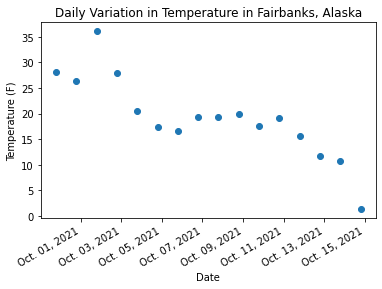

In [31]:
x = df['date']
y = df['temperature']
plt.plot_date(x,y)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b. %d, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.title('Daily Variation in Temperature in Fairbanks, Alaska')

The temperature is gradually getting cooler. This makes sense since it is now fall.

Text(0.5, 1.0, 'Percent Daily Cloud Coverage in Fairbanks, Alaska')

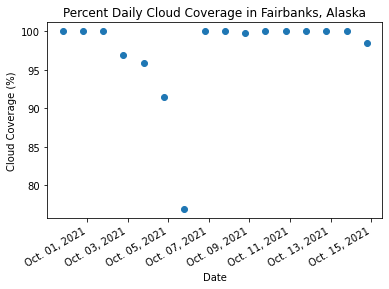

In [32]:
x = df['date']
y = df['perc_clouds']
plt.plot_date(x,y)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b. %d, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xlabel('Date')
plt.ylabel('Cloud Coverage (%)')
plt.title('Percent Daily Cloud Coverage in Fairbanks, Alaska')

It will be almost 100% cloudy on most days.

Text(0.5, 1.0, 'Daily Precipitation in Fairbanks, Alaska')

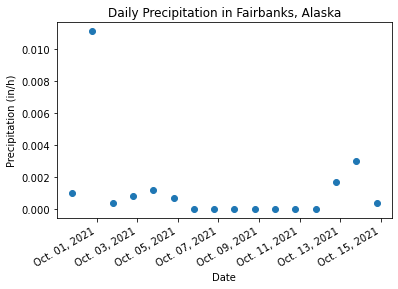

In [33]:
x = df['date']
y = df['precip_int']
plt.plot_date(x,y)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b. %d, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xlabel('Date')
plt.ylabel('Precipitation (in/h)')
plt.title('Daily Precipitation in Fairbanks, Alaska')

Almost no precipitation is expected.

In conclusion, Fairbanks, Alaska has cloudy, mostly dry (minimal snow) days ahead. Because this dataset only includes 15 days of predictions, it's not enough to hypothesize the weather much further out. However, it's a good dataset for exploratory observations of current weather conditions in Fairbanks.